<a href="https://colab.research.google.com/github/hhcchc7/bigdata/blob/master/1119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
ls

function (name, pos = -1L, envir = as.environment(pos), all.names = FALSE, 
    pattern, sorted = TRUE) 
{
    if (!missing(name)) {
        pos <- tryCatch(name, error = function(e) e)
        if (inherits(pos, "error")) {
            name <- substitute(name)
            if (!is.character(name)) 
                name <- deparse(name)
            warning(gettextf("%s converted to character string", 
                sQuote(name)), domain = NA)
            pos <- name
        }
    }
    all.names <- .Internal(ls(envir, all.names, sorted))
    if (!missing(pattern)) {
        if ((ll <- length(grep("[", pattern, fixed = TRUE))) && 
            ll != length(grep("]", pattern, fixed = TRUE))) {
            if (pattern == "[") {
                pattern <- "\\["
                warning("replaced regular expression pattern '[' by  '\\\\['")
            }
            else if (length(grep("[^\\\\]\\[<-", pattern))) {
                pattern <- sub("\\[<-", "\\\\\\[<-", pattern)
                warning("replaced '[<-' by '\\\\[<-' in regular expression pattern")
            }
        }
        grep(pattern, all.names, value = TRUE)
    }
    else all.names
}
<bytecode: 0x564d09717508>
<environment: namespace:base>

In [ ]:
pkgs <- c("tidyverse", "lubridate")
install.packages(pkgs)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)
library(lubridate)

In [ ]:
nobel <- read.csv("nobel_winners.csv")

In [ ]:
nobel

prize_year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,gender,organization_name,organization_city,organization_country,death_date,death_city,death_country
<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services he has rendered by the discovery of the laws of chemical dynamics and osmotic pressure in solutions""",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composition, which gives evidence of lofty idealism, artistic perfection and a rare combination of the qualities of both heart and intellect""",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NA,NA,NA,1907-09-07,Châtenay,France
1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its application against diphtheria, by which he has opened a new road in the domain of medical science and thereby placed in the hands of the physician a victorious weapon against illness and deaths""",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
1901,Peace,The Nobel Peace Prize 1901,NA,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NA,NA,NA,1910-10-30,Heiden,Switzerland
1901,Peace,The Nobel Peace Prize 1901,NA,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NA,NA,NA,1912-06-12,Paris,France
1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services he has rendered by the discovery of the remarkable rays subsequently named after him""",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services he has rendered by his work on sugar and purine syntheses""",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of historical writing, with special reference to his monumental work, <I>A history of Rome</I>""",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NA,NA,NA,1903-11-01,Charlottenburg,Germany
1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has shown how it enters the organism and thereby has laid the foundation for successful research on this disease and methods of combating it""",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom


In [ ]:
#%>% 管線運算子,將左側的運算結果傳遞至右側函數的第一個參數
nobel %>% count(category)

category,n
<chr>,<int>
Chemistry,194
Economics,83
Literature,113
Medicine,227
Peace,130
Physics,222


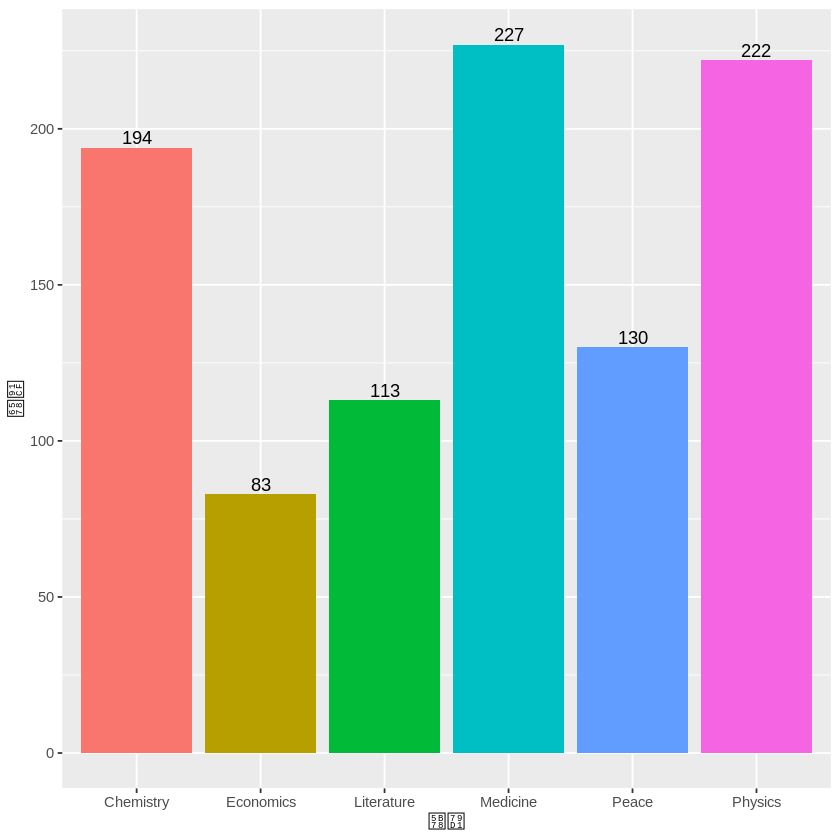

In [20]:
nobel %>%
count(category) %>%
ggplot(aes(x = category, y = n, fill = category)) +
geom_col()+
geom_text(aes(label= n), vjust = -0.25)+
labs(tital = "不同學科諾貝爾獎獲獎次數對比", x = "學科", y = "數量")+ theme(legend.position = "none")

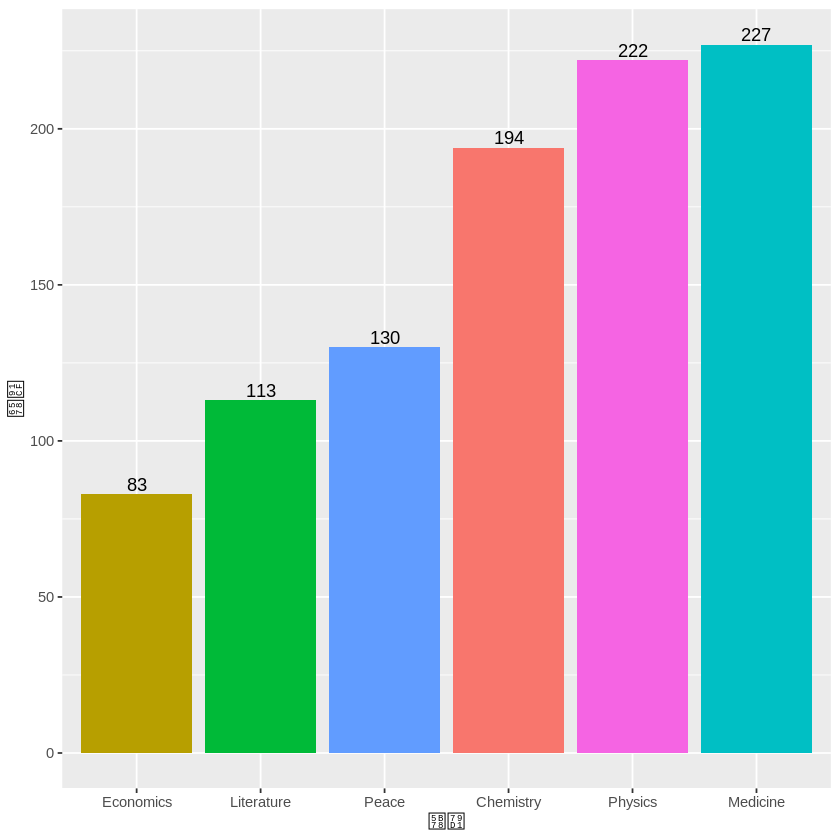

In [19]:
nobel %>%
count(category) %>%
ggplot(aes(x = fct_reorder(category, n), y = n, fill = category)) +
geom_col()+
geom_text(aes(label= n), vjust = -0.25)+
labs(tital = "不同學科諾貝爾獎獲獎次數對比", x = "學科", y = "數量")+ theme(legend.position = "none")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




vctrs      (0.3.4 -> 0.3.5) [CRAN]
magrittr   (1.5   -> 2.0.1) [CRAN]
rstudioapi (0.12  -> 0.13 ) [CRAN]
rprojroot  (1.3-2 -> 2.0.2) [CRAN]


Installing 4 packages: vctrs, magrittr, rstudioapi, rprojroot

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpZx5Z90/remotes3971ce20e6/Mikata-Project-ggthemr-3a86e28/DESCRIPTION’
─  preparing ‘ggthemr’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Removed empty directory ‘ggthemr/README_files’
─  building ‘ggthemr_1.1.0.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



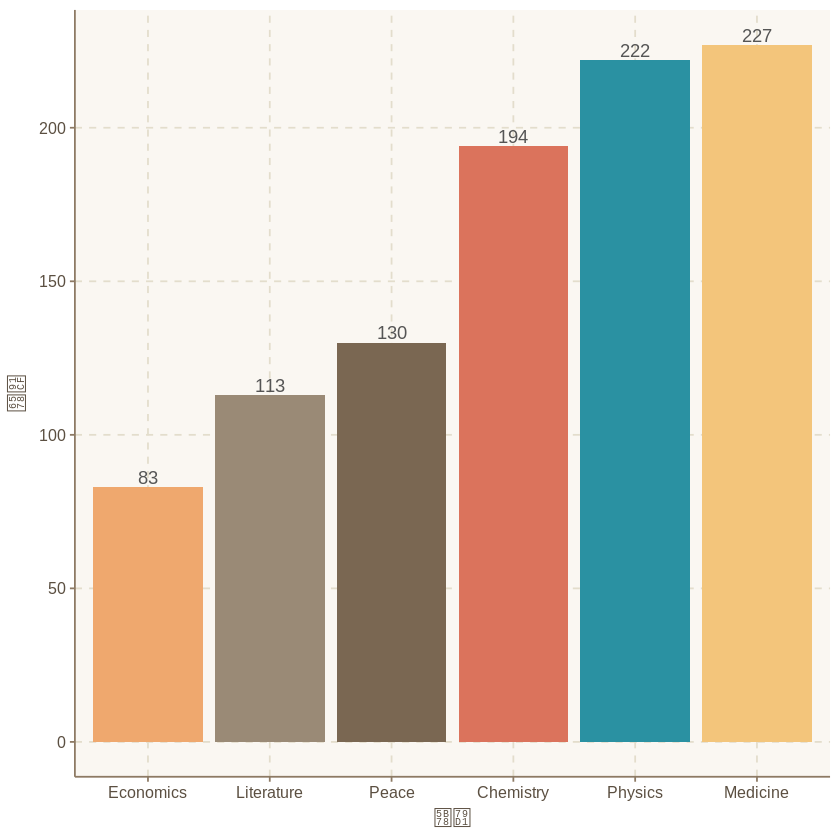

In [22]:
install.packages("devtools")
devtools::install_github('cttobin/ggthemr')

library(ggthemr)
ggthemr("dust")

nobel %>%
count(category) %>%
ggplot(aes(x = fct_reorder(category, n), y = n, fill = category)) +
geom_col()+
geom_text(aes(label= n), vjust = -0.25)+
labs(tital = "不同學科諾貝爾獎獲獎次數對比", x = "學科", y = "數量")+ theme(legend.position = "none")


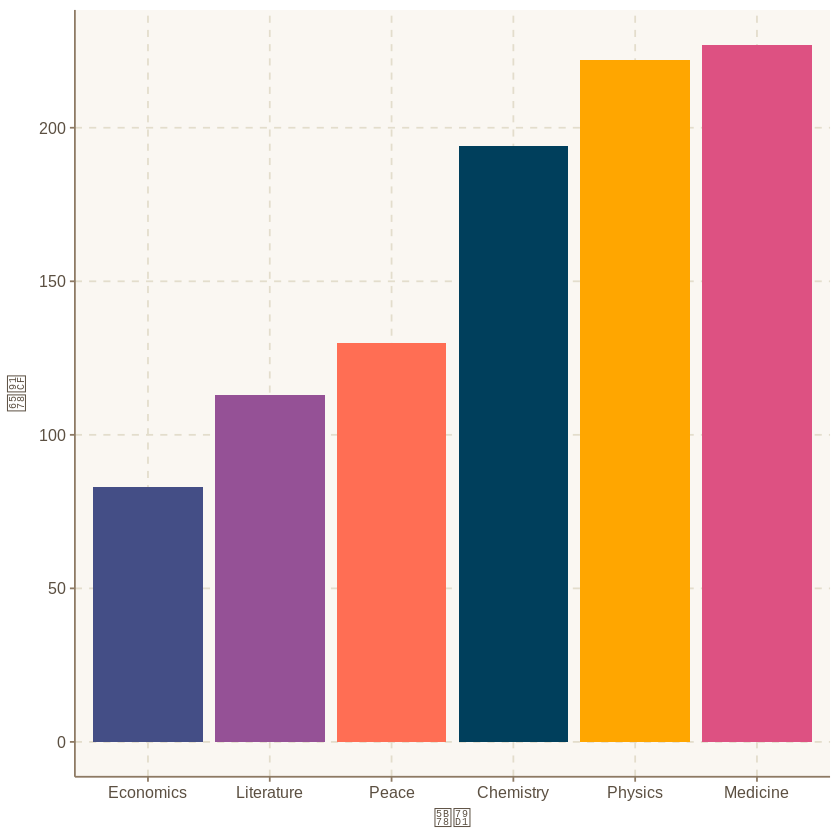

In [26]:
nobel %>%
count(category) %>%
ggplot(aes(x = fct_reorder(category, n), y = n, fill = category)) +
geom_col(fill = c("#003f5c", "#444e86", "#955196", "#dd5182", "#ff6e54" , "#ffa600"))+
labs(tital = "不同學科諾貝爾獎獲獎次數對比", x = "學科", y = "數量")+ theme(legend.position = "none")

In [28]:
nobel %>%
dplyr::filter(birth_country == "United States of America") %>%
dplyr::select(full_name, prize_year, category)

full_name,prize_year,category
<chr>,<int>,<chr>
Theodore Roosevelt,1906,Peace
Elihu Root,1912,Peace
Theodore William Richards,1914,Chemistry
Thomas Woodrow Wilson,1919,Peace
Robert Andrews Millikan,1923,Physics
Charles Gates Dawes,1925,Peace
Arthur Holly Compton,1927,Physics
Frank Billings Kellogg,1929,Peace
Sinclair Lewis,1930,Literature


In [29]:
nobel_winners <- nobel %>%
mutate_if(is.character, tolower) %>%
distinct_at(vars(full_name, prize_year, category), .keep_all = TRUE) %>%
mutate(
decade = 10 * (prize_year %/% 10),
prize_age = prize_year - year(birth_date)
)
nobel_winners

prize_year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,gender,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade,prize_age
<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1901,chemistry,the nobel prize in chemistry 1901,"""in recognition of the extraordinary services he has rendered by the discovery of the laws of chemical dynamics and osmotic pressure in solutions""",1/1,160,individual,jacobus henricus van 't hoff,1852-08-30,rotterdam,netherlands,male,berlin university,berlin,germany,1911-03-01,berlin,germany,1900,49
1901,literature,the nobel prize in literature 1901,"""in special recognition of his poetic composition, which gives evidence of lofty idealism, artistic perfection and a rare combination of the qualities of both heart and intellect""",1/1,569,individual,sully prudhomme,1839-03-16,paris,france,male,NA,NA,NA,1907-09-07,châtenay,france,1900,62
1901,medicine,the nobel prize in physiology or medicine 1901,"""for his work on serum therapy, especially its application against diphtheria, by which he has opened a new road in the domain of medical science and thereby placed in the hands of the physician a victorious weapon against illness and deaths""",1/1,293,individual,emil adolf von behring,1854-03-15,hansdorf (lawice),prussia (poland),male,marburg university,marburg,germany,1917-03-31,marburg,germany,1900,47
1901,peace,the nobel peace prize 1901,NA,1/2,462,individual,jean henry dunant,1828-05-08,geneva,switzerland,male,NA,NA,NA,1910-10-30,heiden,switzerland,1900,73
1901,peace,the nobel peace prize 1901,NA,1/2,463,individual,frédéric passy,1822-05-20,paris,france,male,NA,NA,NA,1912-06-12,paris,france,1900,79
1901,physics,the nobel prize in physics 1901,"""in recognition of the extraordinary services he has rendered by the discovery of the remarkable rays subsequently named after him""",1/1,1,individual,wilhelm conrad röntgen,1845-03-27,lennep (remscheid),prussia (germany),male,munich university,munich,germany,1923-02-10,munich,germany,1900,56
1902,chemistry,the nobel prize in chemistry 1902,"""in recognition of the extraordinary services he has rendered by his work on sugar and purine syntheses""",1/1,161,individual,hermann emil fischer,1852-10-09,euskirchen,prussia (germany),male,berlin university,berlin,germany,1919-07-15,berlin,germany,1900,50
1902,literature,the nobel prize in literature 1902,"""the greatest living master of the art of historical writing, with special reference to his monumental work, <i>a history of rome</i>""",1/1,571,individual,christian matthias theodor mommsen,1817-11-30,garding,schleswig (germany),male,NA,NA,NA,1903-11-01,charlottenburg,germany,1900,85
1902,medicine,the nobel prize in physiology or medicine 1902,"""for his work on malaria, by which he has shown how it enters the organism and thereby has laid the foundation for successful research on this disease and methods of combating it""",1/1,294,individual,ronald ross,1857-05-13,almora,india,male,university college,liverpool,united kingdom,1932-09-16,putney heath,united kingdom,1900,45


In [30]:
nobel_winners %>% count(full_name, sort = T)

full_name,n
<chr>,<int>
comité international de la croix rouge (international committee of the red cross),3
frederick sanger,2
john bardeen,2
linus carl pauling,2
"marie curie, née sklodowska",2
office of the united nations high commissioner for refugees (unhcr),2
a. michael spence,1
aage niels bohr,1
aaron ciechanover,1


Warning message:
“Removed 1 rows containing missing values (position_stack).”


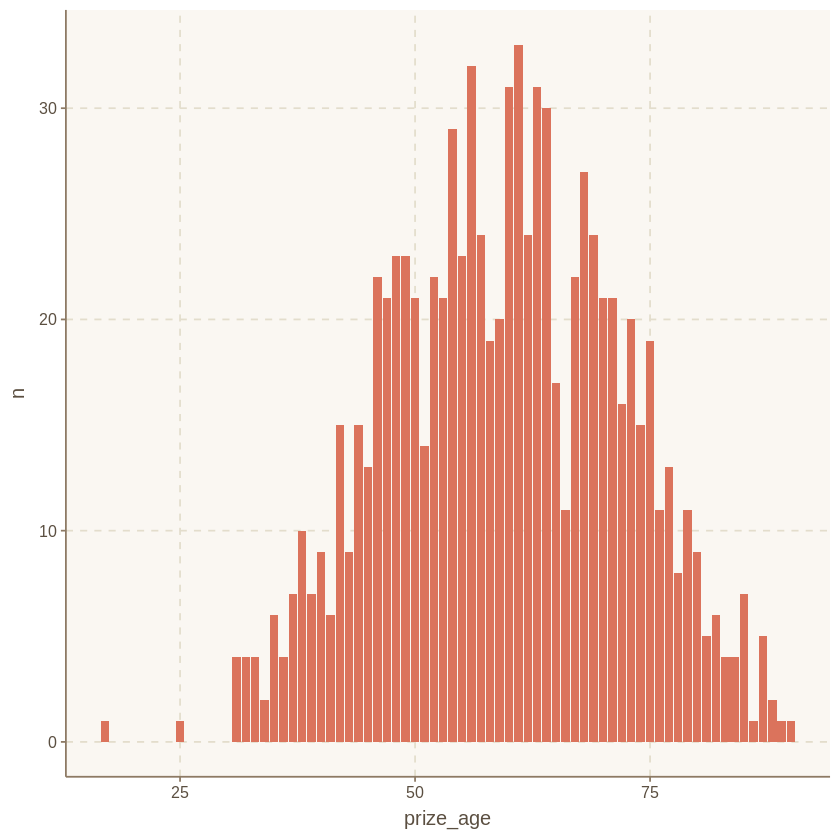

In [31]:
nobel_winners %>% 
count(prize_age) %>%
ggplot(aes(x= prize_age, y = n ))+
geom_col()

In [33]:
nobel_winners %>%
group_by(category) %>%
summarise(mean_prize_age = mean(prize_age, na.rm = T))

`summarise()` ungrouping output (override with `.groups` argument)



category,mean_prize_age
<chr>,<dbl>
chemistry,58.04023
economics,67.19481
literature,64.67257
medicine,57.97156
peace,61.38835
physics,55.37438


Warning message:
“Removed 30 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 30 rows containing missing values (geom_point).”


<ggproto object: Class CoordFlip, CoordCartesian, Coord, gg>
    aspect: function
    backtransform_range: function
    clip: on
    default: FALSE
    distance: function
    expand: TRUE
    is_free: function
    is_linear: function
    labels: function
    limits: list
    modify_scales: function
    range: function
    render_axis_h: function
    render_axis_v: function
    render_bg: function
    render_fg: function
    setup_data: function
    setup_layout: function
    setup_panel_guides: function
    setup_panel_params: function
    setup_params: function
    train_panel_guides: function
    transform: function
    super:  <ggproto object: Class CoordFlip, CoordCartesian, Coord, gg>

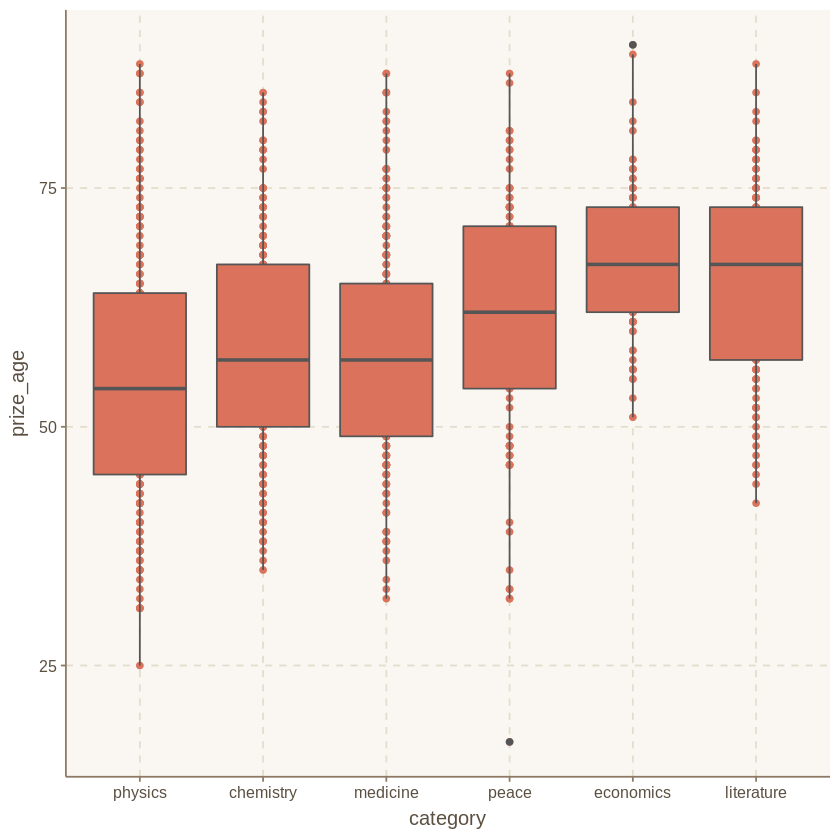

In [34]:
nobel_winners %>%
mutate(category = fct_reorder(category, prize_age, median, na.rm = TRUE)) %>%
ggplot(aes(category, prize_age)) +
geom_point() +
geom_boxplot()
coord_flip()

In [36]:
install.packages("ggridges")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




Picking joint bandwidth of 3.78

Warning message:
“Removed 30 rows containing non-finite values (stat_density_ridges).”


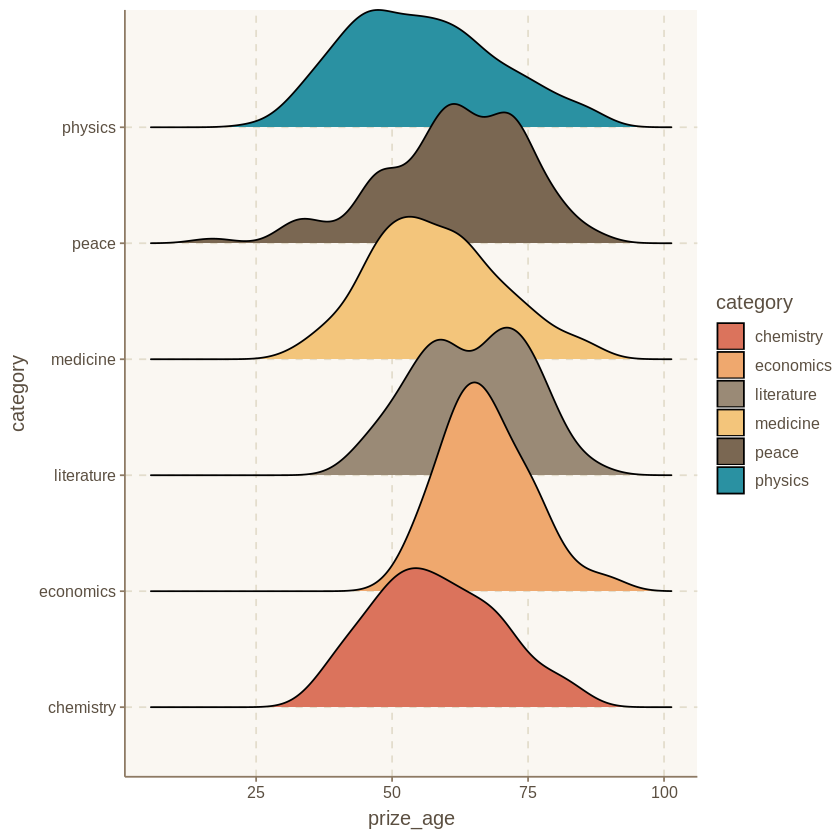

In [37]:
library(ggridges)

nobel_winners %>%
ggplot(aes(x = prize_age, y = category, fill = category)) +
geom_density_ridges()

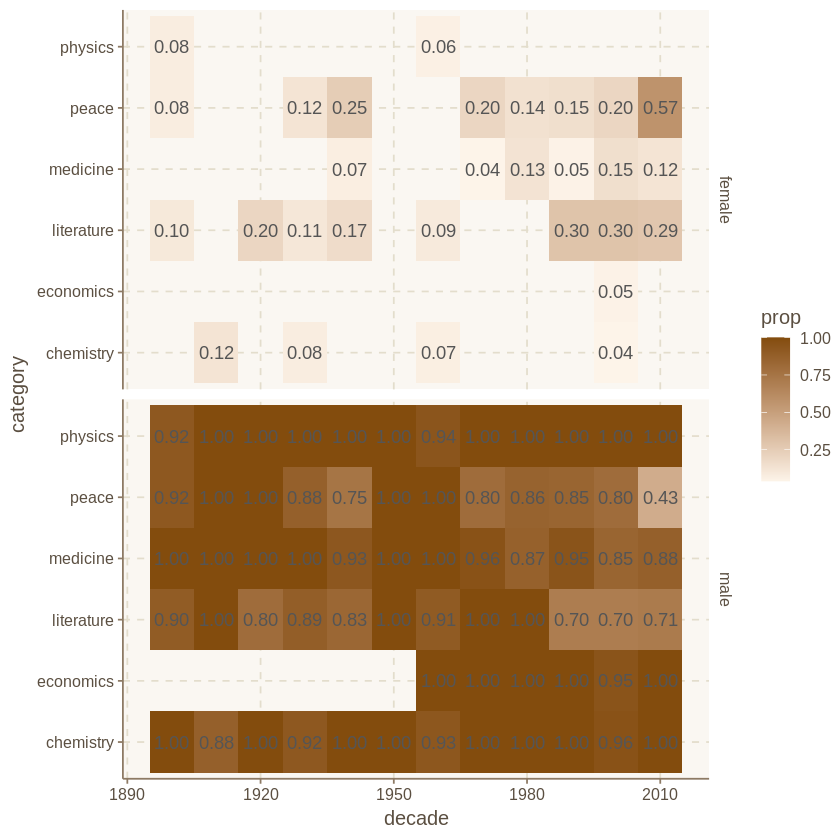

In [38]:
nobel_winners %>%
dplyr::filter(laureate_type == "individual") %>%
# mutate(decade = glue::glue("{round(prize_year - 1, -1)}s")) %>%
count(decade, category, gender) %>%
group_by(decade, category) %>%
mutate(prop = n / sum(n)) %>%
ggplot(aes(decade, category, fill = prop)) +
geom_tile(size = 0.7) +
# geom_text(aes(label = scales::percent(prop, accuracy = .01))) +
geom_text(aes(label = scales::number(prop, accuracy = .01))) +
facet_grid(vars(gender)) +
scale_fill_gradient(low = "#FDF4E9", high = "#834C0D")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘beeswarm’, ‘vipor’


Warning message:
“Removed 30 rows containing missing values (position_beeswarm).”


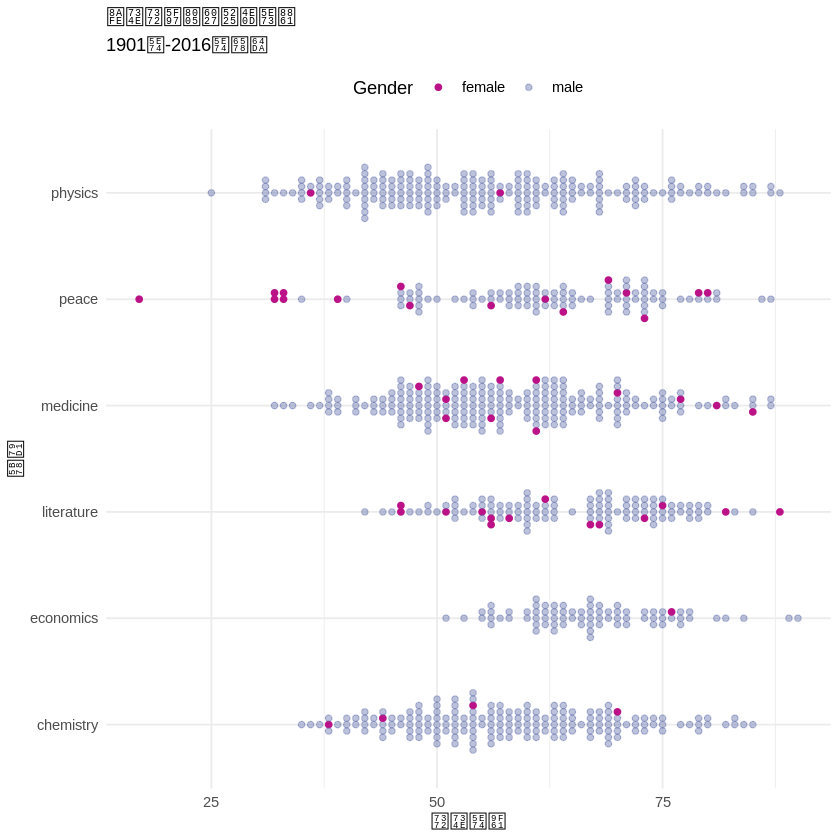

In [39]:
install.packages("ggbeeswarm")
library(ggbeeswarm)

nobel_winners %>%

ggplot(aes(x = category, y = prize_age, colour = gender, alpha = gender)) +
ggbeeswarm::geom_beeswarm()+
coord_flip() +
scale_color_manual(values = c("#BB1288", "#5867A6")) +
scale_alpha_manual(values = c(1, .4)) +
theme_minimal() +
theme(legend.position = "top") +
labs(
title = "諾獎獲得者性別不平衡"
,
subtitle = "1901年-2016年數據"
,

colour = "Gender",
alpha = "Gender",
x = "學科"
,
y = "獲獎年齡")

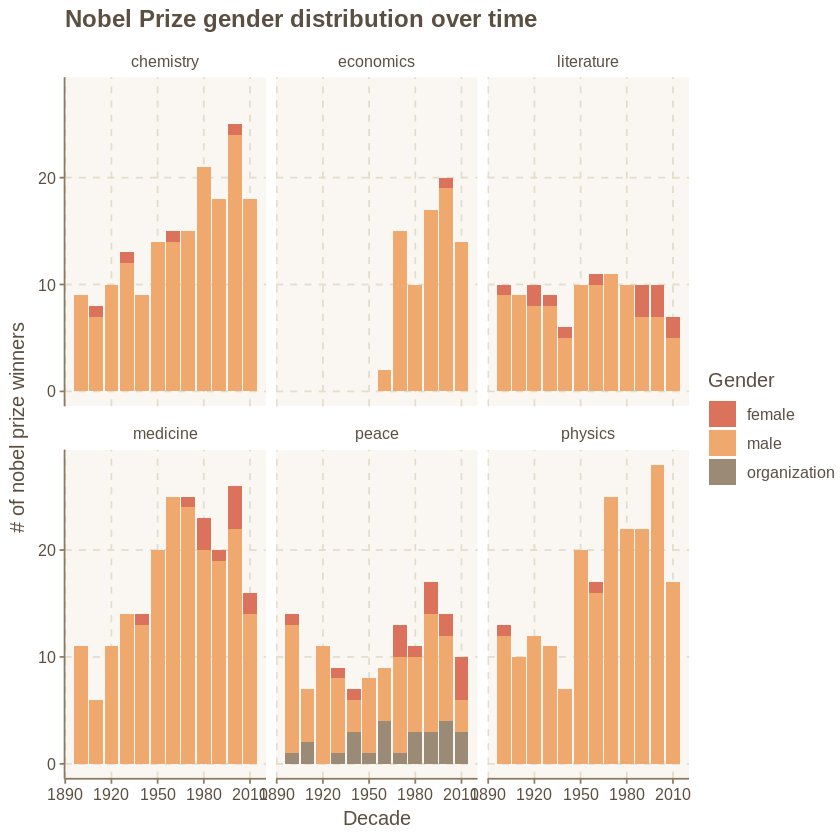

In [40]:
nobel_winners %>%
count(decade, category, gender = coalesce(gender, laureate_type)) %>%
group_by(decade, category) %>%
mutate(percent = n / sum(n)) %>%
ggplot(aes(decade, n, fill = gender)) +
geom_col() +
facet_wrap(~category) +
labs(
x = "Decade",
y = "# of nobel prize winners",
fill = "Gender",
title= "Nobel Prize gender distribution over time")

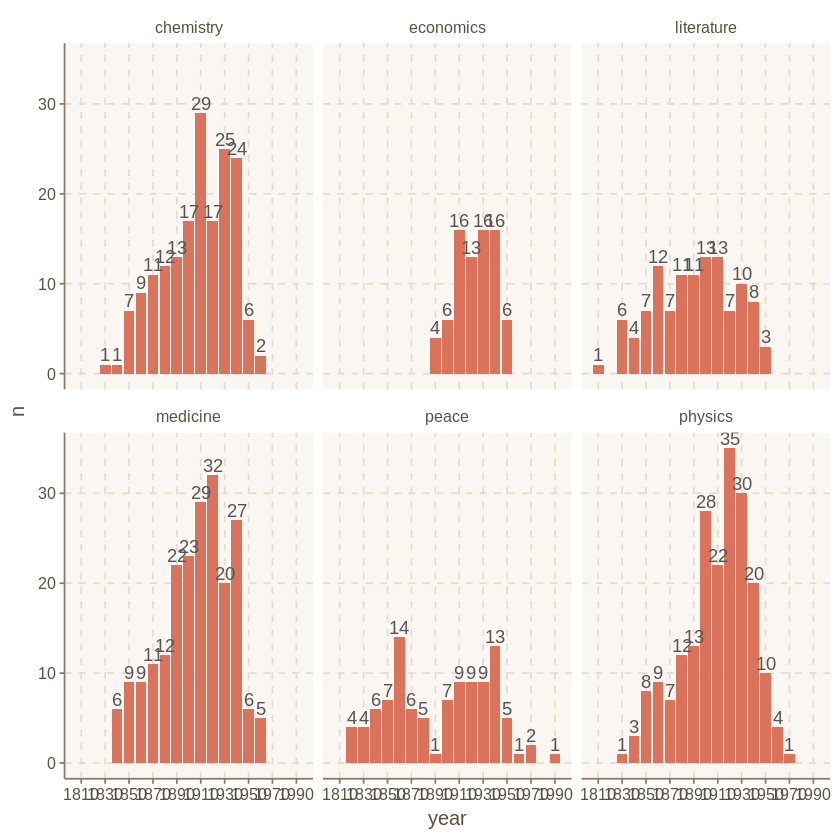

In [41]:
nobel_winners %>%
select(category, birth_date) %>%
mutate(year = floor(year(birth_date) / 10) * 10) %>%
count(category, year) %>%
dplyr::filter(!is.na(year)) %>%
ggplot(aes(x = year, y = n)) +
geom_col() +
scale_x_continuous(breaks = seq(1810, 1990, 20)) +
geom_text(aes(label = n), vjust = -0.25) +
facet_wrap(vars(category))